# Thư viện sử dụng

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report



In [2]:
# Đọc dữ liệu
df = pd.read_csv('./data/seattle-weather.csv')

In [3]:
df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


+ Dữ liệu thời tiết thành phố Seattle - Mỹ
- date : năm tháng ngày
- precipitation : Lượng mưa (mm)
- temp-max : Nhiệt độ cao nhất (°C)
- temp_min : Nhiệt độ thấp nhất (°C)
- wind : Gió (m/s)
- weather : Thời tiết

- Dữ liệu thời tiết trong vòng 4 năm (2012-2016)

In [4]:
df.shape

(1461, 6)

In [5]:
df_filtered = df[df["weather"].str.contains("snow")].value_counts

# Hiển thị DataFrame đã lọc
print(df_filtered)

<bound method DataFrame.value_counts of             date  precipitation  temp_max  temp_min  wind weather
13    2012-01-14            4.1       4.4       0.6   5.3    snow
14    2012-01-15            5.3       1.1      -3.3   3.2    snow
15    2012-01-16            2.5       1.7      -2.8   5.0    snow
16    2012-01-17            8.1       3.3       0.0   5.6    snow
17    2012-01-18           19.8       0.0      -2.8   5.0    snow
18    2012-01-19           15.2      -1.1      -2.8   1.6    snow
19    2012-01-20           13.5       7.2      -1.1   2.3    snow
56    2012-02-26            1.3       5.0      -1.1   3.4    snow
58    2012-02-28            3.6       6.7      -0.6   4.2    snow
59    2012-02-29            0.8       5.0       1.1   7.0    snow
65    2012-03-06            0.5       6.7       0.0   2.7    snow
71    2012-03-12           19.3       8.3       0.6   6.2    snow
72    2012-03-13            9.4       5.6       0.6   5.3    snow
74    2012-03-15           23.9     

- rain: mưa
- sun: nắng
- fog: sương mù
- drizzle: mưa phùn
- snow: tuyết

Text(0.5, 1.0, 'Count of Weather Categories')

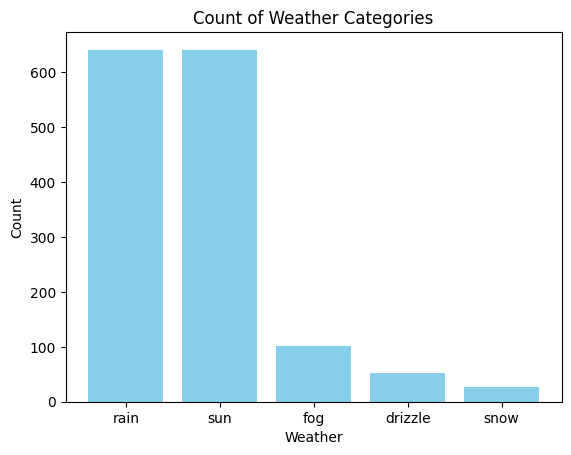

In [6]:
weather_counts = df['weather'].value_counts()
plt.bar(weather_counts.index, weather_counts.values, color='skyblue')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.title('Count of Weather Categories')

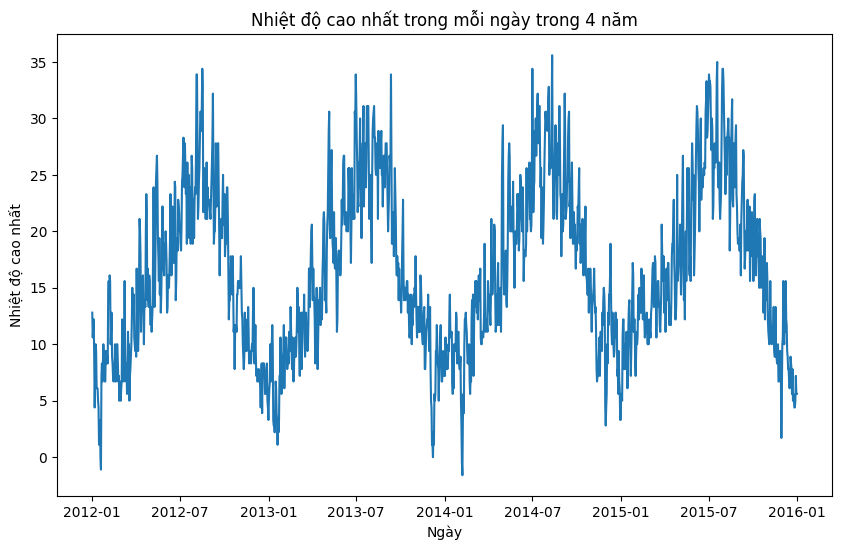

In [7]:
df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(10,6))
plt.plot(df['date'], df['temp_max'])
plt.title('Nhiệt độ cao nhất trong mỗi ngày trong 4 năm')
plt.xlabel('Ngày')
plt.ylabel('Nhiệt độ cao nhất')

plt.show()

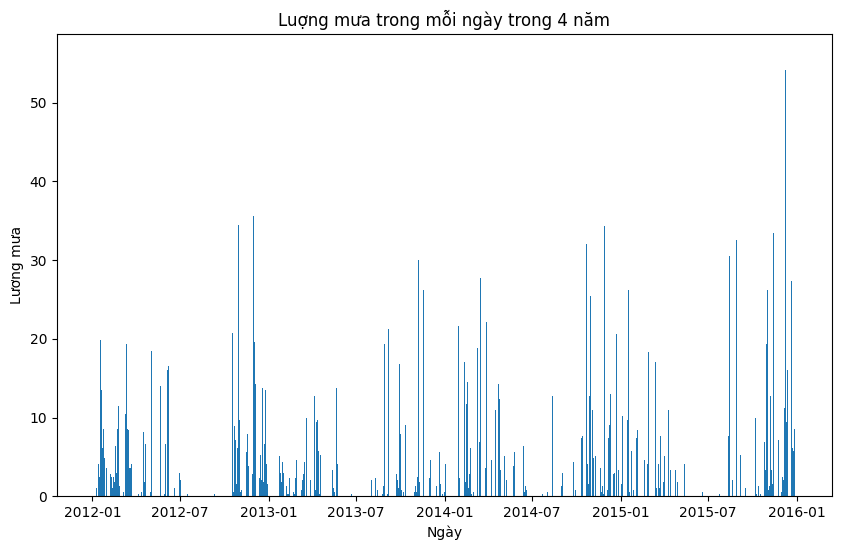

In [8]:
df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(10,6))
plt.bar(df['date'], df['precipitation'])
plt.title('Luợng mưa trong mỗi ngày trong 4 năm')
plt.xlabel('Ngày')
plt.ylabel('Lương mưa')

plt.show()

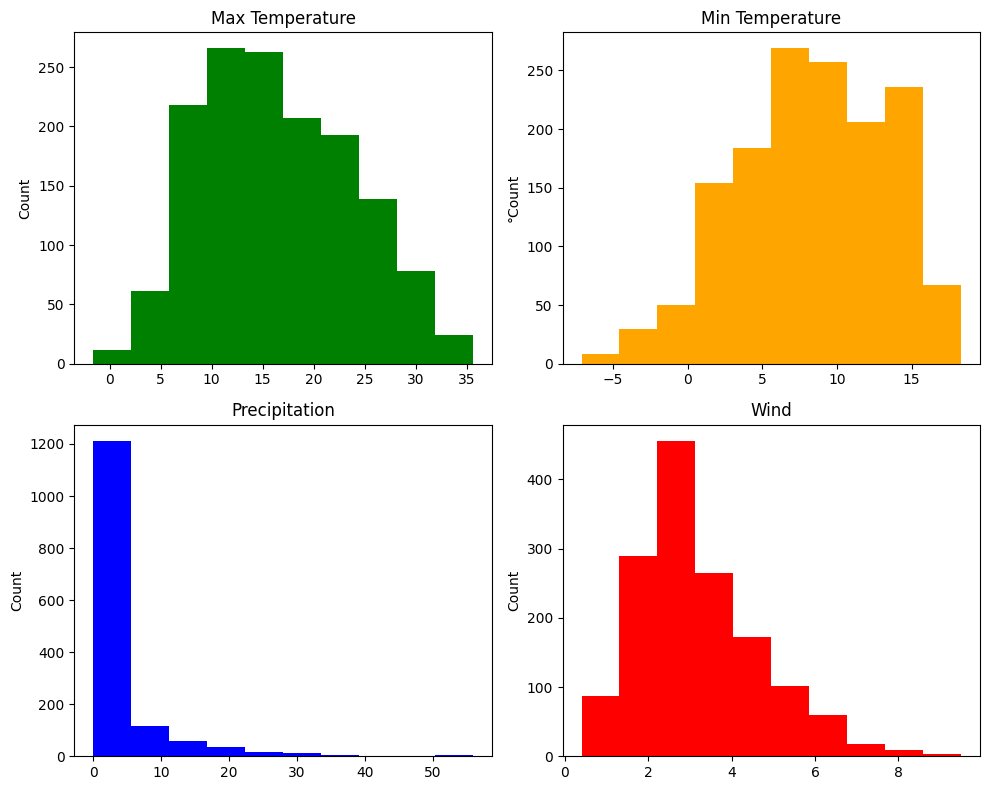

In [9]:
# Tạo một figure và các axes
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Vẽ histogram cho từng cột lên từng axes
df["temp_max"].plot(kind="hist", ax=axs[0, 0], title="Max Temperature", color='green')
axs[0, 0].set_ylabel("Count")

df["temp_min"].plot(kind="hist", ax=axs[0, 1], title="Min Temperature", color='orange')
axs[0, 1].set_ylabel("°Count")

df["precipitation"].plot(kind="hist", ax=axs[1, 0], title="Precipitation", color='blue')
axs[1, 0].set_ylabel("Count")

df["wind"].plot(kind="hist", ax=axs[1, 1], title="Wind", color='red')
axs[1, 1].set_ylabel("Count")

# Điều chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


In [10]:
df.iloc[:,1:4]

,precipitation,temp_max,temp_min
0,0.0,12.8,5.0
1,10.9,10.6,2.8
2,0.8,11.7,7.2
3,20.3,12.2,5.6
4,1.3,8.9,2.8
...,...,...,...
1456,8.6,4.4,1.7
1457,1.5,5.0,1.7
1458,0.0,7.2,0.6
1459,0.0,5.6,-1.0


<Axes: >

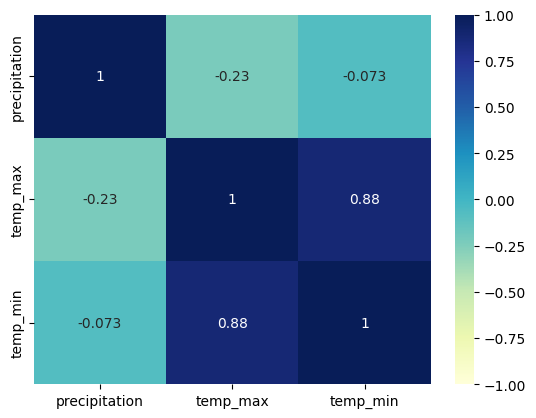

In [11]:

corr_matrix = df.iloc[:,1:4].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)

In [12]:
df.isnull().any()

date             False
precipitation    False
temp_max         False
temp_min         False
wind             False
weather          False
dtype: bool

# Các mô hình học máy

In [13]:
data = df.drop(["date"], axis = 1)

In [14]:
y = data['weather']
x = data[['temp_max', 'temp_min', 'precipitation', 'wind']]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 9)


In [16]:
len(x_train),len(x_test)

(1022, 439)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier()
rfmodel = rfmodel.fit(x_train, y_train)
rfscore = rfmodel.score(x_test, y_test)
print("Accuracy of KNN model is:",rfscore)


Accuracy of KNN model is: 0.8496583143507973


In [18]:
y_pred = rfmodel.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     drizzle       0.33      0.08      0.12        13
         fog       0.35      0.19      0.25        31
        rain       0.98      0.92      0.95       189
        snow       1.00      0.40      0.57         5
         sun       0.79      0.95      0.86       201

    accuracy                           0.85       439
   macro avg       0.69      0.51      0.55       439
weighted avg       0.83      0.85      0.83       439



- Optimize performance

In [19]:
df_filtered = df[df["weather"].str.contains("drizzle")].head(10)
# Hiển thị DataFrame đã lọc
print(df_filtered)

          date  precipitation  temp_max  temp_min  wind  weather
0   2012-01-01            0.0      12.8       5.0   4.7  drizzle
26  2012-01-27            0.0       6.7      -2.2   1.4  drizzle
45  2012-02-15            0.0       7.2       0.6   1.8  drizzle
85  2012-03-26            0.0      12.8       6.1   4.3  drizzle
103 2012-04-13            0.0      15.0       3.9   4.0  drizzle
118 2012-04-28            0.0      16.1       8.3   2.5  drizzle
135 2012-05-15            0.0      24.4       9.4   4.1  drizzle
175 2012-06-24            0.0      19.4       9.4   2.0  drizzle
186 2012-07-05            0.0      24.4      10.6   3.1  drizzle
191 2012-07-10            0.0      23.9      11.1   2.3  drizzle


In [41]:
rfmodel = RandomForestClassifier(criterion='entropy')
rfmodel = rfmodel.fit(x_train, y_train)
# predict the mode 
y_pred = rfmodel.predict(x_test) 
#rfscore = rfmodel.score(y_pred, y_test)
#print("Accuracy of KNN model is:",rfscore)
# performance evaluatio metrics 
print(classification_report(y_pred, y_test)) 

              precision    recall  f1-score   support

     drizzle       0.08      0.33      0.12         3
         fog       0.16      0.29      0.21        17
        rain       0.92      0.97      0.94       178
        snow       0.40      1.00      0.57         2
         sun       0.93      0.78      0.85       239

    accuracy                           0.84       439
   macro avg       0.50      0.68      0.54       439
weighted avg       0.89      0.84      0.86       439



In [44]:
from sklearn.ensemble import RandomForestClassifier

acc = []
for n_estimators in range(1, 100): 
    model = RandomForestClassifier(n_estimators=n_estimators)

    # Train model
    model.fit(x_train, y_train)
    
    # Predict using the trained model
    y_pred1 = model.predict(x_test)
    
    # Evaluate model : accuracy
    accuracy = model.score(x_test, y_test)
    
    # Append accuracy to the list
    acc.append(accuracy)


Text(0.5, 1.0, 'Độ chính xác của Random Forest với n_estimators khác nhau')

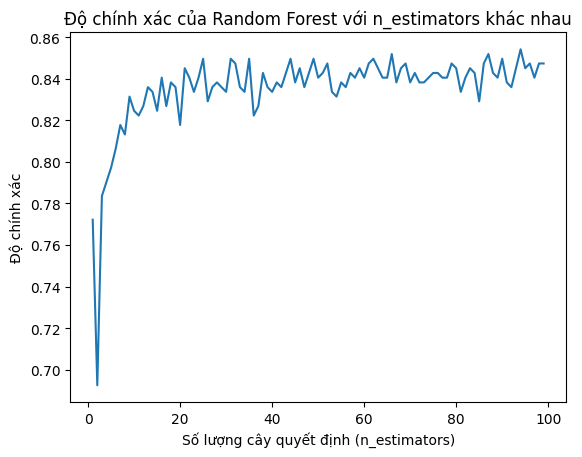

In [45]:
# Tạo biểu đồ đường
plt.plot(range(1,100), acc)

# Thiết lập nhãn và tiêu đề
plt.xlabel("Số lượng cây quyết định (n_estimators)")
plt.ylabel("Độ chính xác")
plt.title("Độ chính xác của Random Forest với n_estimators khác nhau")

In [46]:
param_grid = { 
    'n_estimators': range(90,100), 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

In [47]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(x_train, y_train) 
print(grid_search.best_estimator_) 

RandomForestClassifier(max_depth=3, max_leaf_nodes=6, n_estimators=92)


In [48]:
model_random = RandomForestClassifier(max_depth=3, 
                                      max_leaf_nodes=6, 
                                      n_estimators=92) 
model_random.fit(x_train, y_train) 
y_pred_rand = model_random.predict(x_test)
print(classification_report(y_pred_rand, y_test)) 

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         0
         fog       0.00      0.00      0.00         0
        rain       0.92      0.98      0.95       177
        snow       0.20      1.00      0.33         1
         sun       1.00      0.77      0.87       261

    accuracy                           0.85       439
   macro avg       0.42      0.55      0.43       439
weighted avg       0.96      0.85      0.90       439



C:\Users\nhuyh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nhuyh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nhuyh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetri

- Mô hình KNN

In [61]:
# Huấn luyện mô hình
K = [] 
training = [] 
test = [] 
scores = {} 
  
for k in range(2, 21): 
    clf = KNeighborsClassifier(n_neighbors = k) 
    clf.fit(x_train, y_train) 
  
    training_score = clf.score(x_train, y_train) 
    test_score = clf.score(x_test, y_test) 
    K.append(k) 
  
    training.append(training_score) 
    test.append(test_score) 
    scores[k] = [training_score, test_score] 

In [62]:
# Đánh giá mô hình
for keys, values in scores.items(): 
    print(keys, ':', values) 

2 : [0.837573385518591, 0.6287015945330297]
3 : [0.8307240704500979, 0.7107061503416856]
4 : [0.8062622309197651, 0.7220956719817767]
5 : [0.7954990215264188, 0.744874715261959]
6 : [0.7906066536203522, 0.7357630979498861]
7 : [0.7798434442270059, 0.7676537585421412]
8 : [0.7857142857142857, 0.7425968109339408]
9 : [0.7788649706457925, 0.744874715261959]
10 : [0.7788649706457925, 0.7471526195899773]
11 : [0.7651663405088063, 0.7471526195899773]
12 : [0.7651663405088063, 0.7471526195899773]
13 : [0.7671232876712328, 0.7471526195899773]
14 : [0.7690802348336595, 0.7471526195899773]
15 : [0.7592954990215264, 0.7471526195899773]
16 : [0.7602739726027398, 0.7425968109339408]
17 : [0.7622309197651663, 0.7471526195899773]
18 : [0.7524461839530333, 0.7403189066059226]
19 : [0.7583170254403131, 0.7403189066059226]
20 : [0.7495107632093934, 0.7334851936218679]
21 : [0.7495107632093934, 0.7380410022779044]
22 : [0.7475538160469667, 0.7357630979498861]
23 : [0.7475538160469667, 0.7380410022779044]

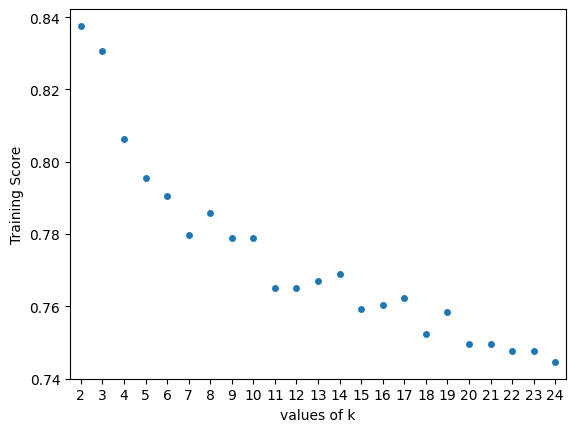

In [63]:
ax = sns.stripplot(x=K, y=training); 
ax.set(xlabel ='values of k', ylabel ='Training Score')   
plt.show() 
# function to show plot 

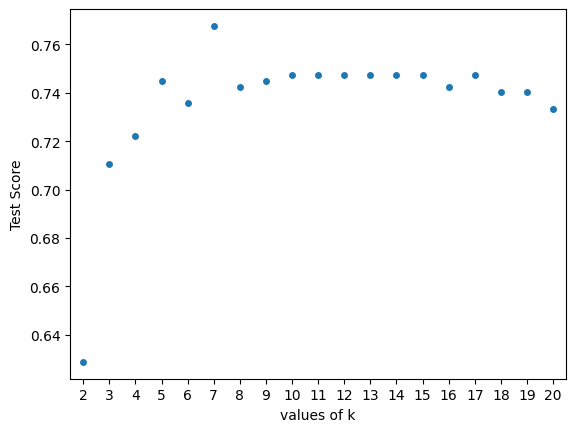

In [59]:
ax = sns.stripplot(x=K, y=test); 
ax.set(xlabel ='values of k', ylabel ='Test Score') 
plt.show() 

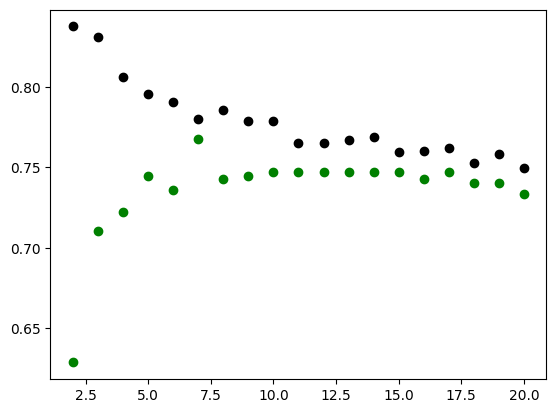

In [60]:
plt.scatter(x=K, y=training, color ='k') 
plt.scatter(x=K, y=test, color ='g') 
plt.show() 
# For overlapping scatter plots 

In [66]:
knn = KNeighborsClassifier(n_neighbors=7)
knnmodel = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print(classification_report(y_pred_knn, y_test))

              precision    recall  f1-score   support

     drizzle       0.08      0.25      0.12         4
         fog       0.16      0.50      0.24        10
        rain       0.83      0.83      0.83       188
        snow       0.20      1.00      0.33         1
         sun       0.87      0.74      0.80       236

    accuracy                           0.77       439
   macro avg       0.43      0.66      0.46       439
weighted avg       0.82      0.77      0.79       439



In [67]:
knn = KNeighborsClassifier()
knnmodel = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print(classification_report(y_pred_knn, y_test))

              precision    recall  f1-score   support

     drizzle       0.08      0.11      0.09         9
         fog       0.23      0.33      0.27        21
        rain       0.83      0.81      0.82       192
        snow       0.20      1.00      0.33         1
         sun       0.81      0.75      0.78       216

    accuracy                           0.74       439
   macro avg       0.43      0.60      0.46       439
weighted avg       0.77      0.74      0.76       439



In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x) # Tính trung bình và độ lệch chuẩn của từng đặc trưng
scaler = StandardScaler()
data_norm = scaler.fit_transform(x)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(data_norm, y, test_size = 0.3, random_state = 9)


In [26]:
knn = KNeighborsClassifier()
knnmodel = knn.fit(x_train, y_train)
knnscore = knn.score(x_test, y_test)
print("Accuracy of KNN model is:",knnscore)

Accuracy of KNN model is: 0.744874715261959


In [27]:
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     drizzle       0.11      0.08      0.09        13
         fog       0.33      0.23      0.27        31
        rain       0.81      0.83      0.82       189
        snow       1.00      0.20      0.33         5
         sun       0.75      0.81      0.78       201

    accuracy                           0.74       439
   macro avg       0.60      0.43      0.46       439
weighted avg       0.73      0.74      0.73       439



In [28]:
knnacc = []
for k in range(1,50): 
    model = KNeighborsClassifier(n_neighbors=k)

    # train model 
    model = model.fit(x_train, y_train)


    # Evaluate model : accuracy
    knnaccuracy = model.score(x_test, y_test)
    knnacc.append(knnaccuracy)

Text(0.5, 1.0, 'KNN Accuracy vs k')

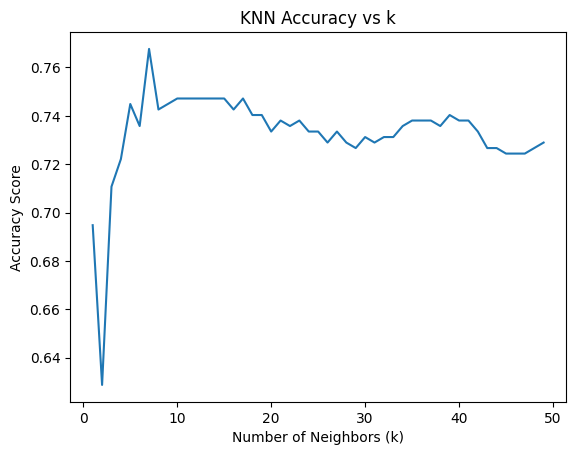

In [29]:
# Tạo biểu đồ đường
plt.plot(range(1,50), knnacc)

# Thiết lập nhãn và tiêu đề
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy Score")
plt.title("KNN Accuracy vs k")

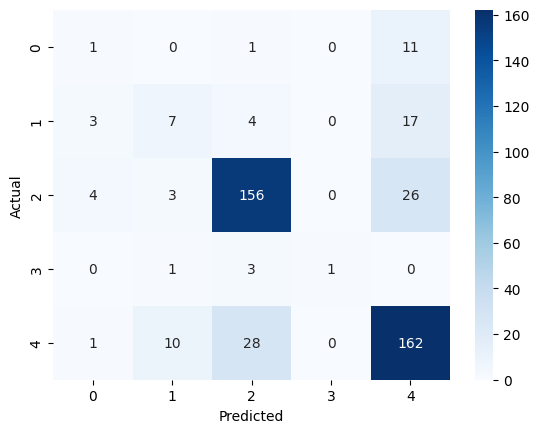

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [31]:

misclassified_indexes = np.where(y_test != y_pred)[0]
print(f'Misclassified indexes: {misclassified_indexes}')

Misclassified indexes: [  2  11  12  17  19  20  21  26  28  35  42  45  68  75  76  77  83  87
  89  92  96  99 104 111 113 116 120 121 123 125 131 132 141 148 152 153
 156 160 165 177 178 179 183 189 193 203 209 211 217 219 233 236 237 240
 241 243 251 252 254 260 267 279 281 282 284 289 292 293 296 299 306 308
 318 319 321 327 332 336 339 343 346 347 348 349 350 351 354 356 360 361
 366 376 380 383 386 390 391 392 395 396 400 401 407 409 414 417 419 420
 422 423 427 437]


In [32]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn, x_train, y_train, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {np.mean(cv_scores):.2f}')


Cross-validation scores: [0.68292683 0.66341463 0.71078431 0.71568627 0.71568627]
Mean cross-validation score: 0.70
